# Linear Regression
## Question 1
Make a class called LinearRegression which provides two functions : fit and predict. Try to implement it from scratch. If stuck, refer to the examples folder.

In [ ]:
class Linear_Regression:
        def __init__ (self, learning_rate= 0.01, iterations= 1000):
                self.learning_rate = learning_rate
                self.iterations= iterations
                self.w= 0
                self.b= 0

        def fit(self, x,y):
            m= len(x)
            for i in range(self.iterations):
                f_x= self.w*x+self.b
                dw= (1/m) * sum((f_x - y) * x)
                db = (1/m) * sum(f_x - y)
                self.w= self.w-self.learning_rate*dw
                self.b=self.b-self.learning_rate*db

        def predict(self,x):
              return self.w*x+ self.b

## Question 2

Use the dataset https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction (*).
1. Read it using pandas.
2. Check for **null values**.
3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
4. Remove the unwanted columns.
5. Split the dataset into train and test data. Test data size = 25% of total dataset.
6. **Normalize** the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
7. Fit the training data into the model created in question 1 and predict the testing data.
8. Use **mean square error and R<sup>2</sup>** from sklearn.metrics as evaluation criterias.
9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R<sup>2</sup>.
10. Tune the hyperparameters of your models (learning rate, epochs) to achieve losses close to that of the sklearn models.

Note : (*) To solve this question, you may proceed in any of the following ways :
1. Prepare the notebook in Kaggle, download it and submit it separately with the other questions.
2. Download the dataset from kaggle. Upload it to the session storage in Colab.
3. Use Colab data directly in Colab. [Refer here](https://www.kaggle.com/general/74235). For this, you need to create kaggle API token. Before submitting, hide or remove the API token.

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


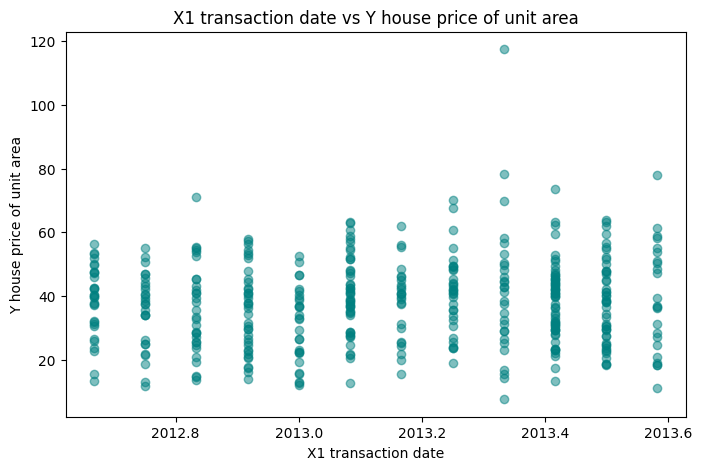

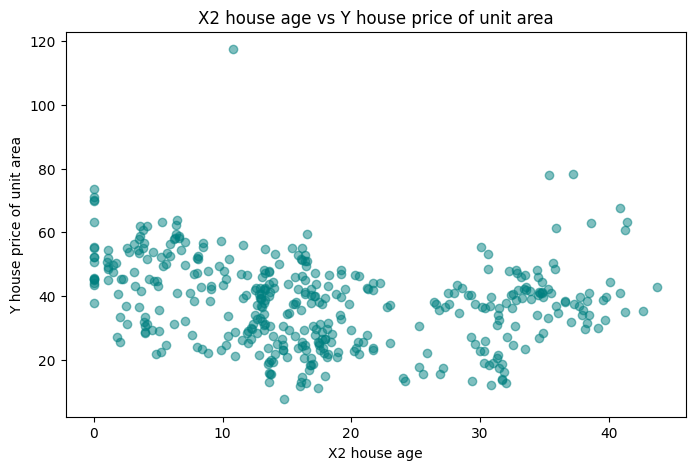

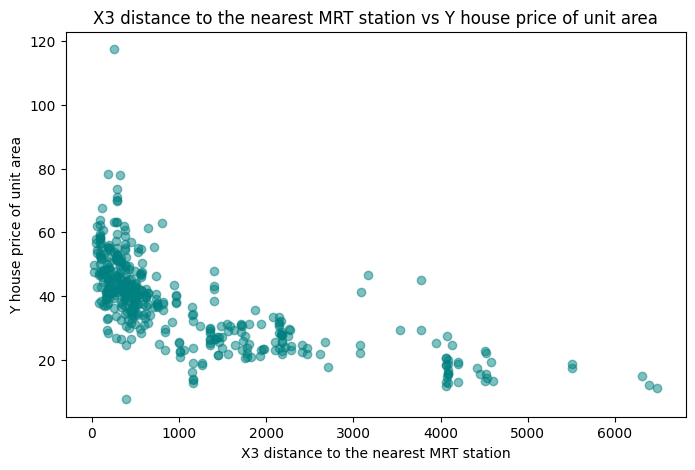

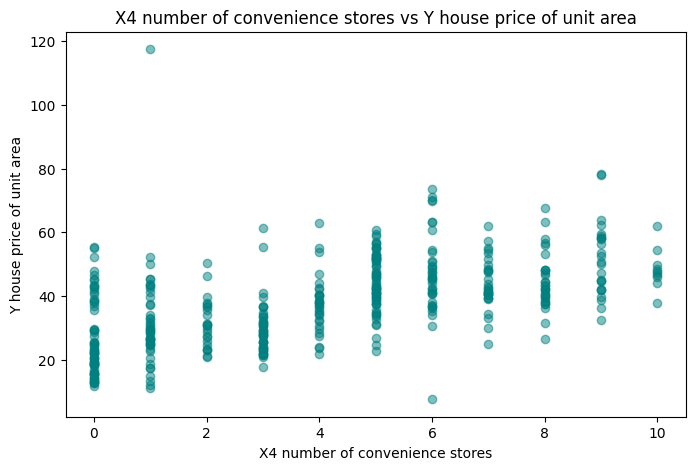

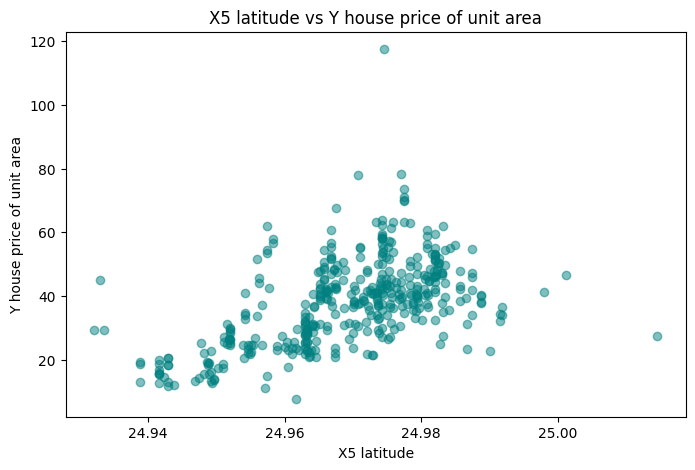

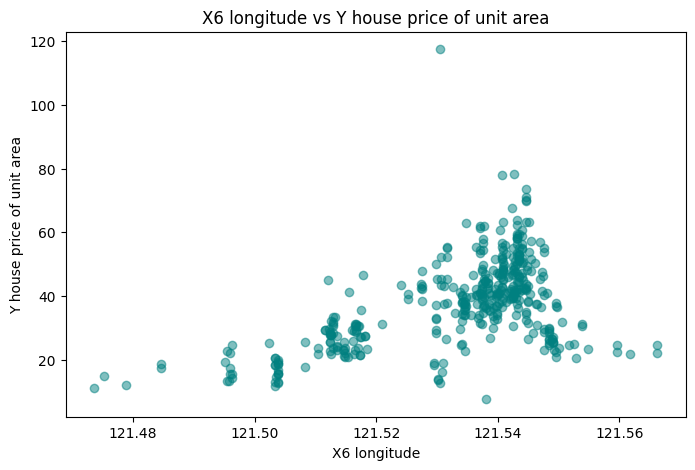

Mean Squared Error: 57.8164
R-squared Score: 0.6137
Sklearn MSE: 58.2932
Sklearn R2: 0.6106


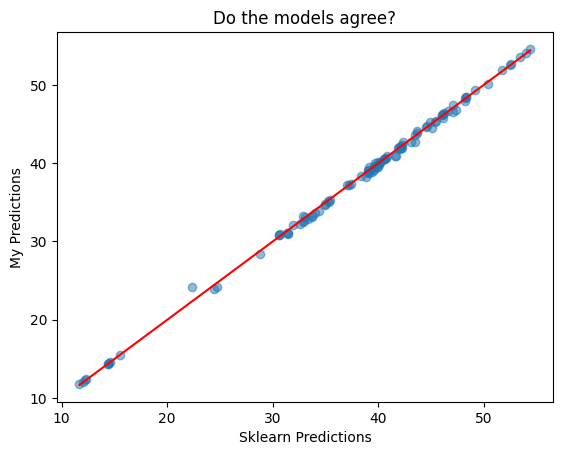

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression as SklearnLR


data = pd.read_csv('Real estate.csv')

print(data.isnull().sum())
#the data has no null values

features = data.columns[1:-1]
target = data.columns[-1]
for col in features:
    plt.figure(figsize=(8,5))
    plt.scatter(data[col], data[target], alpha=0.5, color='teal')
    plt.title(f'{col} vs {target}')
    plt.xlabel(col)
    plt.ylabel(target)
    plt.show()


# Drops the first and second columns as they are no. and transaction date which dont matter much
data = data.drop(data.columns[[0, 1]], axis=1)
#spliting the data
X= data.drop(data.columns[-1], axis=1)
y= data[data.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)
#normalizing the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)
#in the last problem we made the model for a single independent variable, but  for this ques we will have to make a multiple varible model

class MultipleLinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.lr = learning_rate
        self.iterations = iterations
        self.weights = None  # This will now be an ARRAY of weights (one for each column)
        self.bias = None

    def fit(self, X, y):

        n_samples, n_features = X.shape


        self.weights = np.zeros(n_features)
        self.bias = 0


        for i in range(self.iterations):

            y_predicted = np.dot(X, self.weights) + self.bias


            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)


            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


model = MultipleLinearRegression(learning_rate=0.05, iterations=10000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)



mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")


#using inbuit model

sk_model = SklearnLR()
sk_model.fit(X_train_scaled, y_train)
sk_pred = sk_model.predict(X_test_scaled)

sk_mse = mean_squared_error(y_test, sk_pred)
sk_r2 = r2_score(y_test, sk_pred)

print(f"Sklearn MSE: {sk_mse:.4f}")
print(f"Sklearn R2: {sk_r2:.4f}")

#comparison
plt.scatter(sk_pred, y_pred, alpha=0.5)
plt.plot([min(sk_pred), max(sk_pred)], [min(sk_pred), max(sk_pred)], color='red') # Diagonal line
plt.xlabel("Sklearn Predictions")
plt.ylabel("My Predictions")
plt.title("Do the models agree?")
plt.show()

# Logistic Regression
## Question 3

The breast cancer dataset is a binary classification dataset commonly used in machine learning tasks. It is available in scikit-learn (sklearn) as part of its datasets module.
Here is an explanation of the breast cancer dataset's components:

* Features (X):

 * The breast cancer dataset consists of 30 numeric features representing different characteristics of the FNA images. These features include mean, standard error, and worst (largest) values of various attributes such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, etc.

* Target (y):

 * The breast cancer dataset is a binary classification problem, and the target variable (y) represents the diagnosis of the breast mass. It contains two classes:
    * 0: Represents a malignant (cancerous) tumor.
    * 1: Represents a benign (non-cancerous) tumor.

Complete the code given below in place of the "..."

1. Load the dataset from sklearn.datasets
2. Separate out the X and Y columns.
3. Normalize the X data using MinMaxScaler or StandardScaler.
4. Create a train-test-split. Take any suitable test size.

In [ ]:

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Load the dataset
data = load_breast_cancer()

# 2. Separate X and y
X = data.data
y = data.target

# 3. Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

5. Write code for the sigmoid function and Logistic regression.


In [ ]:
import numpy as np

def sigmoid(z):
    """Compute the sigmoid of z."""
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    """Compute the derivative of the sigmoid function."""
    s = sigmoid(z)
    return s * (1 - s)

class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        # Initialise the hyperparameters of the model
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)

        # Initialize parameters with zeros
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        # Implement the Gradient Descent algorithm
        for _ in range(self.epochs):
            # Linear combination
            z = np.dot(X, self.weights) + self.bias
            # Activation
            y_pred = sigmoid(z)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        """Return class labels (0 or 1) based on a 0.5 threshold."""
        z = np.dot(X, self.weights) + self.bias
        y_probs = sigmoid(z)
        y_pred = [1 if i > 0.5 else 0 for i in y_probs]
        return np.array(y_pred)

6. Fit your model on the dataset and make predictions.
7. Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
8. Print accuracy_score in each case using sklearn.metrics .

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression as SklearnLogReg
from sklearn.metrics import accuracy_score

custom_model = LogisticRegression(learning_rate=0.1, epochs=1000)
custom_model.fit(X_train, y_train)
y_pred_custom = custom_model.predict(X_test)
print(f"Custom Model Accuracy: {accuracy_score(y_test, y_pred_custom):.4f}")

# 2. Compare with Sklearn using different penalties
penalties = [
    {'penalty': 'l2', 'solver': 'lbfgs'},
    {'penalty': 'l1', 'solver': 'liblinear'},
    {'penalty': 'elasticnet', 'solver': 'saga', 'l1_ratio': 0.5},
    {'penalty': None, 'solver': 'lbfgs'}
]

print("\nSklearn Logistic Regression Comparisons ")
for params in penalties:
    # Initialize Sklearn model with specific penalty/solver
    sk_model = SklearnLogReg(**params, max_iter=1000)
    sk_model.fit(X_train, y_train)
    y_pred_sk = sk_model.predict(X_test)

    p_name = params['penalty'] if params['penalty'] else "None"
    print(f"Penalty: {p_name:10} | Accuracy: {accuracy_score(y_test, y_pred_sk):.4f}")

Custom Model Accuracy: 0.9825

--- Sklearn Logistic Regression Comparisons ---
Penalty: l2         | Accuracy: 0.9737
Penalty: l1         | Accuracy: 0.9737
Penalty: elasticnet | Accuracy: 0.9737
Penalty: None       | Accuracy: 0.9386


9. For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .
10. For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics .

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# 1. Custom Model Metrics
print("=== CUSTOM LOGISTIC REGRESSION: BEST MODEL ===")
print("Classification Report:")
print(classification_report(y_test, y_pred_custom))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_custom))

# 2. Sklearn Model Metrics (Using L2 as the standard best performer)
best_sk_model = SklearnLogReg(penalty='l2', max_iter=1000)
best_sk_model.fit(X_train, y_train)
y_pred_sk_best = best_sk_model.predict(X_test)

print("\n=== SKLEARN LOGISTIC REGRESSION: BEST MODEL (L2) ===")
print("Classification Report:")
print(classification_report(y_test, y_pred_sk_best))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_sk_best))

=== CUSTOM LOGISTIC REGRESSION: BEST MODEL ===
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:
[[42  1]
 [ 1 70]]

=== SKLEARN LOGISTIC REGRESSION: BEST MODEL (L2) ===
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
[[41  2]
 [ 1 70]]


# KNN
## Question 4

How accurately can a K-Nearest Neighbors (KNN) model classify different types of glass based on a glass classification dataset consisting of 214 samples and 7 classes? Use the kaggle dataset "https://www.kaggle.com/datasets/uciml/glass".

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Load the data as you did in the 2nd question.
2. Extract the X and Y columns.
3. Split it into training and testing datasets.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Load the data from Drive (update 'your_folder' to your actual path)
path = '/archive (2) (2).zip'
df = pd.read_csv(path)

# 2. Extract X and Y columns
# Standard Kaggle glass.csv usually has columns: RI, Na, Mg, Al, Si, K, Ca, Ba, Fe, Type
X = df.drop('Type', axis=1)
y = df['Type']

# 3. Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

4. Define Euclidean distance.
5. Build the KNN model.
6. Fit the model on the training data. (Note : you may require to change the type of the data from pandas dataframe to numpy arrays. To do that, just do this X=np.array(X) and so on...)

In [ ]:
import numpy as np
from collections import Counter

# Convert data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        # KNN doesn't "learn" in the traditional sense; it just stores the data
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        # 1. Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # 2. Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]

        # 3. Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # 4. Return the most common class label (majority vote)
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

# Initialize and "Fit" the model
clf = KNN(k=3)
clf.fit(X_train, y_train)

7. Make predictions. Find their accuracy using accuracy_score. Try different k values. k=3 worked well in our case.
8. Compare with the sklearn model (from sklearn.neighbors import KNeighborsClassifier)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# List of k values to test
k_values = [1, 3, 5, 7, 9]

print(f"{'k':<5} | {'Custom Accuracy':<18} | {'Sklearn Accuracy':<18}")
print("-" * 45)

for k in k_values:
    # --- Custom KNN ---
    custom_knn = KNN(k=k)
    custom_knn.fit(X_train, y_train)
    custom_preds = custom_knn.predict(X_test)
    custom_acc = accuracy_score(y_test, custom_preds)

    # --- Sklearn KNN ---
    sk_knn = KNeighborsClassifier(n_neighbors=k)
    sk_knn.fit(X_train, y_train)
    sk_preds = sk_knn.predict(X_test)
    sk_acc = accuracy_score(y_test, sk_preds)

    print(f"{k:<5} | {custom_acc:<18.4f} | {sk_acc:<18.4f}")

# Final comparison for the suggested k=3
print("\n--- Detailed Comparison for k=3 ---")
custom_final = KNN(k=3)
custom_final.fit(X_train, y_train)
y_pred_custom = custom_final.predict(X_test)
print(f"Custom Model Accuracy (k=3): {accuracy_score(y_test, y_pred_custom):.4f}")

sk_final = KNeighborsClassifier(n_neighbors=3)
sk_final.fit(X_train, y_train)
y_pred_sk = sk_final.predict(X_test)
print(f"Sklearn Model Accuracy (k=3): {accuracy_score(y_test, y_pred_sk):.4f}")

k     | Custom Accuracy    | Sklearn Accuracy  
---------------------------------------------
1     | 0.7674             | 0.7674            
3     | 0.8140             | 0.7674            
5     | 0.6977             | 0.6977            
7     | 0.7209             | 0.7209            
9     | 0.6744             | 0.6279            

--- Detailed Comparison for k=3 ---
Custom Model Accuracy (k=3): 0.8140
Sklearn Model Accuracy (k=3): 0.7674
